In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sales= pd.read_csv(r'C:\Users\primo\Downloads\product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [48]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [49]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [50]:
sales['sales_method'] = sales['sales_method'].astype('string')
sales['customer_id'] = sales['customer_id'].astype('string')
sales['state'] = sales['state'].astype('string')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  string 
 2   customer_id        15000 non-null  string 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  string 
dtypes: float64(1), int64(4), string(3)
memory usage: 937.6 KB


In [51]:
sales['sales_method'] = sales['sales_method'].replace({'em + call':'Email + Call', 'email':'Email'})
n_customers_per_method = sales.groupby('sales_method').agg(count_of_customers=('customer_id', 'count'))
n_customers_per_method= n_customers_per_method.reset_index()
print(n_customers_per_method)

   sales_method  count_of_customers
0          Call                4962
1         Email                7466
2  Email + Call                2572


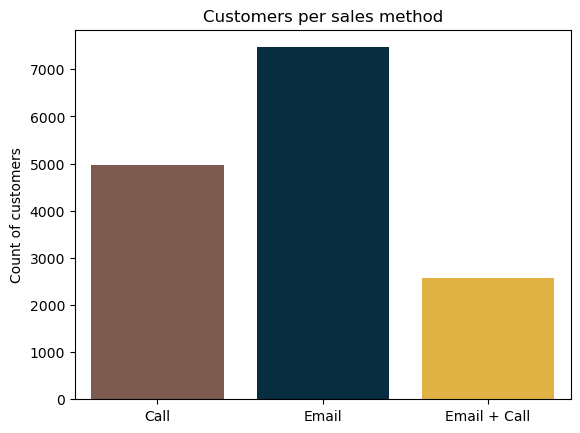

In [52]:
#custom_palette = {"Call": "#1f77b4", "Email": "#df9c20", "Email + Call": "#107010"}
custom_palette = {"Call": "#835648", "Email": "#003049", "Email + Call": "#fabc2a"}
sns.barplot(data=n_customers_per_method, x='sales_method',y='count_of_customers',hue='sales_method',palette=custom_palette)
plt.title("Customers per sales method")
plt.xlabel("")
plt.ylabel('Count of customers')
plt.show()

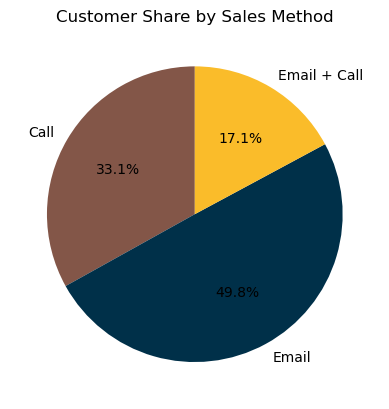

In [53]:
customers_per_method = sales.groupby('sales_method').agg(count_of_customers=('customer_id', 'count'))
colors = [custom_palette[method] for method in customers_per_method.index]
customers_per_method.plot(kind='pie', autopct='%1.1f%%', startangle=90, subplots=True, legend=False, colors=colors)
plt.title("Customer Share by Sales Method")
plt.ylabel("")
plt.show()

In [54]:
more_than_40 = sales[sales['years_as_customer']>40]
print(more_than_40)

       week sales_method                           customer_id  nb_sold  \
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10   
13800     4         Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10   

       revenue  years_as_customer  nb_site_visits       state  
13741    97.22                 63              24  California  
13800    50.47                 47              27  California  


In [55]:
sales.loc[sales['years_as_customer']>40, 'years_as_customer'] = 3

In [57]:
sales_clean = sales.dropna()

In [58]:
sales_clean.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.971492,24.947006
std,1.650650,1.789690,47.435312,5.011238,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,37.000000


In [59]:
revenue_spread = sales_clean['revenue'].describe()
revenue_spread = revenue_spread.round(2)
revenue_spread = revenue_spread.drop(revenue_spread.index[0])
print(revenue_spread)

mean     93.93
std      47.44
min      32.54
25%      52.47
50%      89.50
75%     107.33
max     238.32
Name: revenue, dtype: float64


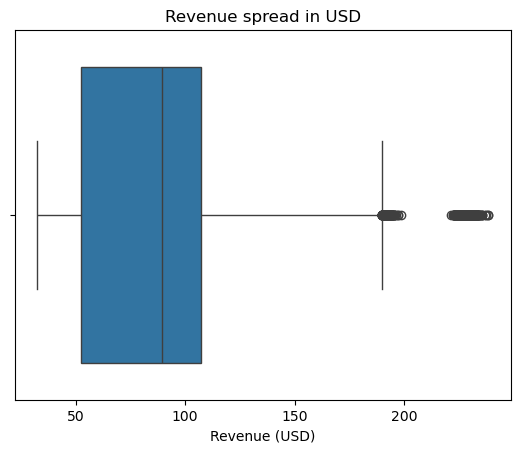

In [60]:
sns.boxplot(x=sales['revenue'])
plt.title("Revenue spread in USD")
plt.xlabel("Revenue (USD)")
plt.show()

In [ ]:
upper_limit= sales['revenue'].quantile(0.75) + (107.3275-52.47) * 1.5
revenue_outliers= sales[sales['revenue']> upper_limit]
revenue_outliers.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,634.000000,634.000000,634.000000,634.000000,634.000000
mean,5.766562,14.586751,219.427792,4.022082,28.652997
std,0.430751,0.893834,15.484224,4.369160,2.968944
min,4.000000,13.000000,189.630000,0.000000,20.000000
25%,6.000000,15.000000,223.147500,1.000000,27.000000
50%,6.000000,15.000000,226.385000,3.000000,29.000000
75%,6.000000,15.000000,228.905000,5.000000,31.000000
max,6.000000,16.000000,238.320000,26.000000,37.000000


In [62]:
revenue_spread_per_method = sales.groupby('sales_method')['revenue'].describe()
revenue_spread_per_method = revenue_spread_per_method.drop(columns='count')
revenue_spread_per_method = revenue_spread_per_method.round(2)
revenue_spread_per_method = revenue_spread_per_method.transpose()
print(revenue_spread_per_method)

sales_method   Call   Email  Email + Call
mean          47.60   97.13        183.65
std            8.61   11.21         29.08
min           32.54   78.83        122.11
25%           41.47   87.88        155.78
50%           49.07   95.58        184.74
75%           52.68  105.17        191.11
max           71.36  148.97        238.32


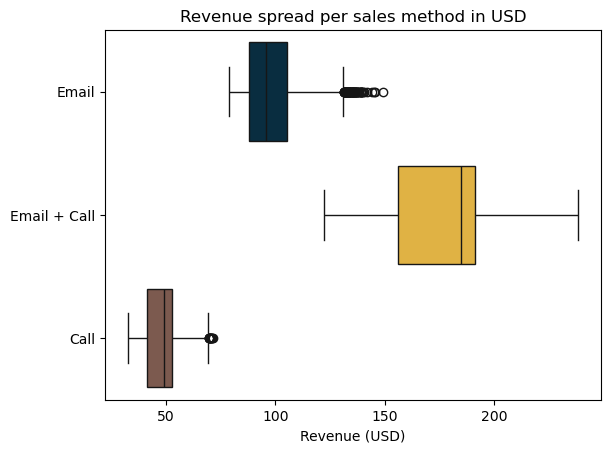

In [63]:
sns.boxplot(x='revenue',y='sales_method',data=sales, hue='sales_method',palette=custom_palette)
plt.xlabel('Revenue (USD)')
plt.ylabel('')
plt.title('Revenue spread per sales method in USD')
plt.show()

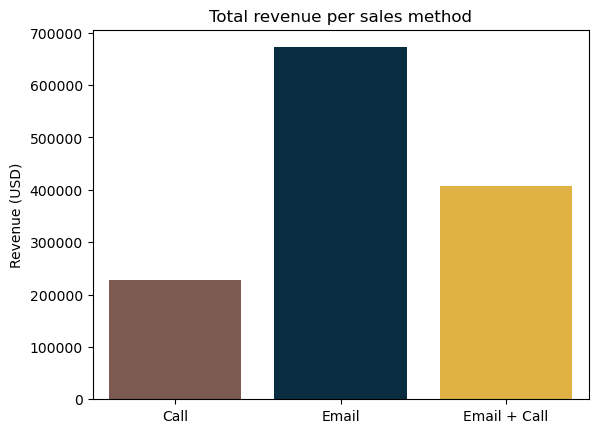

In [64]:
revenue_per_method = sales.groupby('sales_method').agg(avg_revenue= ('revenue','mean'), total_revenue= ('revenue', 'sum'))
revenue_per_method = revenue_per_method.round(2)
revenue_per_method= revenue_per_method.reset_index()
sns.barplot(data=revenue_per_method, y='total_revenue', x='sales_method', hue='sales_method', palette=custom_palette)
plt.title("Total revenue per sales method")
plt.xlabel("")
plt.ylabel("Revenue (USD)")
plt.show()

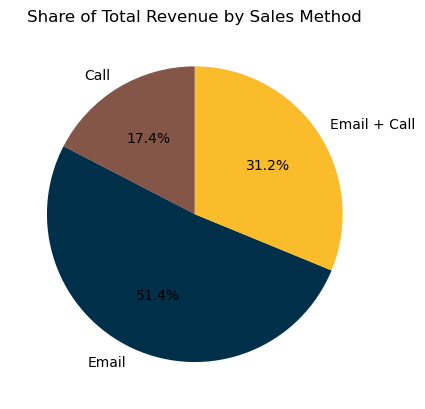

In [65]:
pie_labels= {"Call":0,"Email":1,"Email + Call":2}
revenue_per_method['total_revenue'].plot(kind='pie',autopct='%1.1f%%', startangle=90, legend=False, colors=colors, labels=pie_labels)
plt.ylabel("")
plt.title("Share of Total Revenue by Sales Method")
plt.show()

In [66]:
sales_per_week = sales_clean.groupby(['week','sales_method']).agg(sales= ('customer_id', 'count'), revenue= ('revenue','sum'))
print(sales_per_week)

                   sales    revenue
week sales_method                  
1    Call            740   26159.18
     Email          2626  229765.55
     Email + Call    131   16885.33
2    Call            775   33792.02
     Email          1377  137891.57
     Email + Call    171   26376.23
3    Call            868   36247.27
     Email          1065   98792.14
     Email + Call    324   48737.14
4    Call            964   49593.99
     Email           990  107788.37
     Email + Call    433   78296.20
5    Call           1007   53518.11
     Email           683   74373.45
     Email + Call    676  126809.72
6    Call            427   28252.92
     Email           181   23706.75
     Email + Call    488  111152.07


In [67]:
sales_per_week2 = sales.groupby(['week','sales_method']).agg(sales= ('customer_id', 'count'), revenue= ('revenue','sum'))
print(sales_per_week2)

                   sales    revenue
week sales_method                  
1    Call            758   26159.18
     Email          2815  229765.55
     Email + Call    148   16885.33
2    Call            805   33792.02
     Email          1486  137891.57
     Email + Call    200   26376.23
3    Call            902   36247.27
     Email          1150   98792.14
     Email + Call    359   48737.14
4    Call           1005   49593.99
     Email          1075  107788.37
     Email + Call    495   78296.20
5    Call           1044   53518.11
     Email           743   74373.45
     Email + Call    787  126809.72
6    Call            448   28252.92
     Email           197   23706.75
     Email + Call    583  111152.07


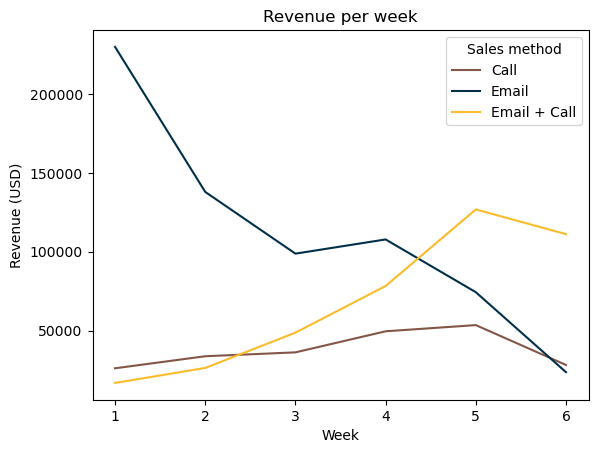

In [68]:
sns.lineplot(data=sales_per_week, x='week', y='revenue', units='sales_method', estimator=None, hue='sales_method', palette=custom_palette)
plt.title("Revenue per week")
plt.xlabel("Week")
plt.ylabel("Revenue (USD)")
plt.legend(title="Sales method")
plt.show()

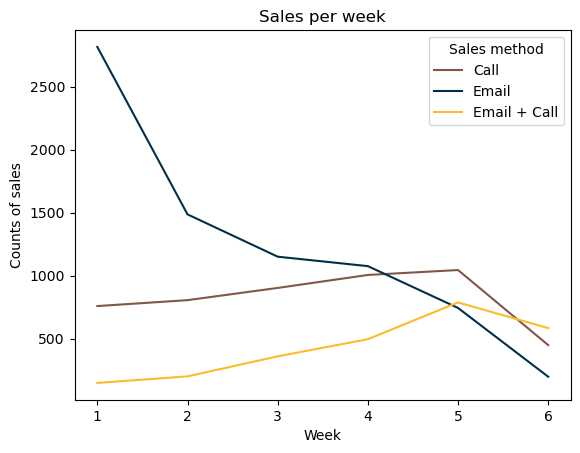

In [69]:
sns.lineplot(data=sales_per_week2, x='week', y='sales', units='sales_method', estimator=None, hue='sales_method', palette= custom_palette)
plt.title("Sales per week")
plt.xlabel("Week")
plt.ylabel("Counts of sales")
plt.legend(title="Sales method")
plt.show()

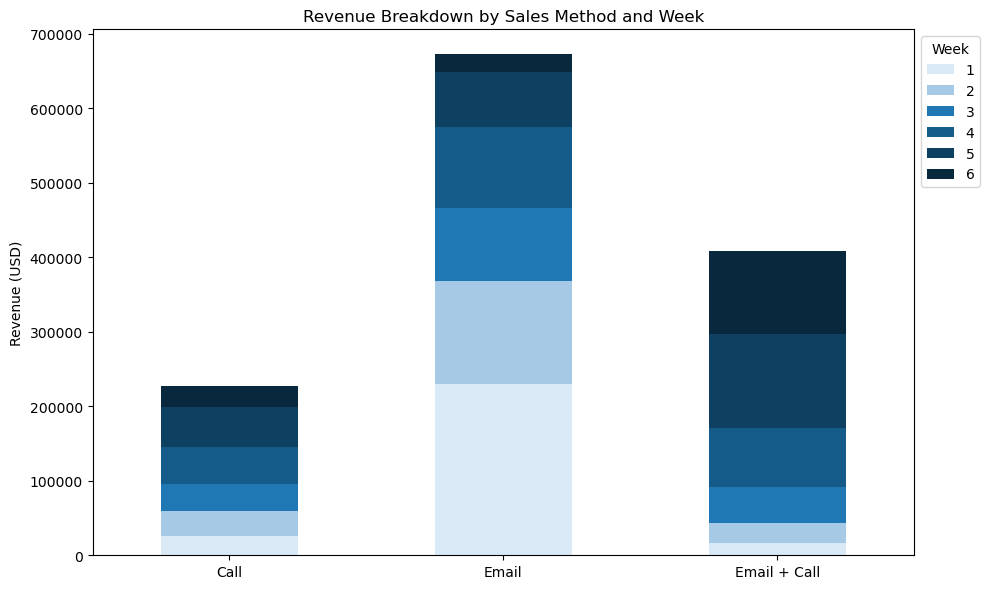

In [70]:
pivot_revenue = sales_clean.pivot_table(index='sales_method',
    columns='week',
    values='revenue',
    aggfunc='sum')
colors = {1: "#d9e9f6",  
    2: "#a6c9e5", 
    3: "#1f77b4",
    4: "#155b89", 
    5: "#0e4061", 
    6: "#08293d"}
pivot_revenue.plot(kind='bar',
    stacked=True,
    color=[colors[week] for week in pivot_revenue.columns], 
    figsize=(10, 6))
plt.title('Revenue Breakdown by Sales Method and Week')
plt.xlabel('')
plt.ylabel('Revenue (USD)')
plt.legend(title="Week", loc='upper left', bbox_to_anchor=(1, 1))  
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [71]:
age_grouped = sales_clean.copy()
bins = range(0, age_grouped['years_as_customer'].max() + 3, 3)
labels = [f"{i}-{i+2}" for i in bins[:-1]]
age_grouped['age_bin']= pd.cut(age_grouped['years_as_customer'], bins= bins, right=False, labels=labels)
age_grouped = age_grouped.groupby(['age_bin', 'sales_method']).agg(avg_revenue= ('revenue','mean'))
print(age_grouped)

                      avg_revenue
age_bin sales_method             
0-2     Call            48.555403
        Email           97.885842
        Email + Call   186.187186
3-5     Call            47.639885
        Email           97.396226
        Email + Call   184.690591
6-8     Call            46.973268
        Email           96.709642
        Email + Call   180.433356
9-11    Call            46.378365
        Email           95.520506
        Email + Call   177.513902
12-14   Call            46.263594
        Email           96.408622
        Email + Call   179.833837
15-17   Call            46.140413
        Email           93.925238
        Email + Call   174.335714
18-20   Call            44.861061
        Email           94.847191
        Email + Call   179.116296
21-23   Call            48.827500
        Email           94.688718
        Email + Call   169.181333
24-26   Call            44.936087
        Email           96.835000
        Email + Call   193.195000
27-29   Call  

C:\Users\primo\AppData\Local\Temp\ipykernel_28288\3928954161.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = age_grouped.groupby(['age_bin', 'sales_method']).agg(avg_revenue= ('revenue','mean'))


C:\Users\primo\AppData\Local\Temp\ipykernel_28288\1224729094.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_pivot = age_grouped.pivot_table(index='age_bin',columns='sales_method',values='avg_revenue')


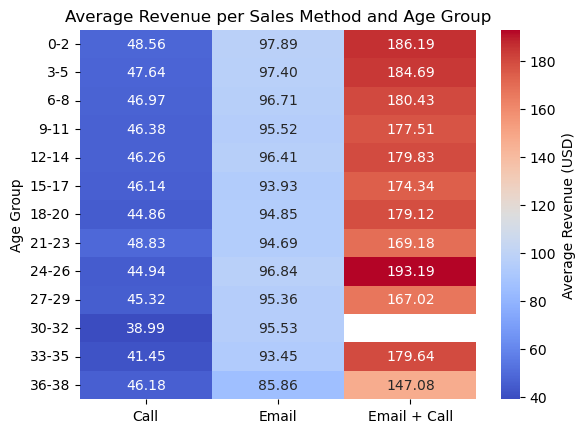

In [72]:
age_pivot = age_grouped.pivot_table(index='age_bin',columns='sales_method',values='avg_revenue')
sns.heatmap(age_pivot, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Revenue (USD)'})
plt.title("Average Revenue per Sales Method and Age Group")
plt.xlabel("")
plt.ylabel("Age Group")
plt.show()

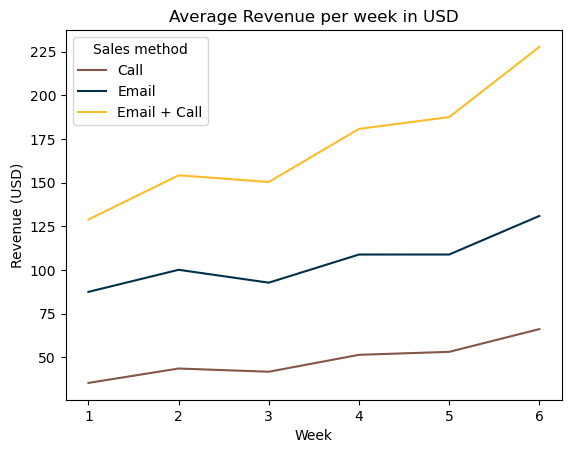

In [ ]:
sales_per_week3 = sales_clean.groupby(['week','sales_method']).agg(sales= ('customer_id', 'count'), avg_revenue= ('revenue','mean'))
sns.lineplot(data=sales_per_week3, x='week', y='avg_revenue', units='sales_method', estimator=None, hue='sales_method', palette=custom_palette)
plt.title("Average Revenue per week in USD")
plt.xlabel("Week")
plt.ylabel("Revenue (USD)")
plt.legend(title="Sales method")
plt.show()


In [74]:
site_visits_grouped= sales_clean.copy()
visits_bins= range(12,40,3)
visits_labels= [f"{i}-{i+2}" for i in visits_bins[:-1]]
site_visits_grouped['site_visits_bin'] = pd.cut(site_visits_grouped['nb_site_visits'], bins= visits_bins, labels= visits_labels, right=False)
site_visits_pivot = site_visits_grouped.pivot_table(index='site_visits_bin',columns='sales_method',values='revenue',aggfunc= 'mean')
print(site_visits_pivot)

sales_method          Call       Email  Email + Call
site_visits_bin                                     
12-14            37.284286   90.925000    127.240000
15-17            39.187672   89.320000    147.416250
18-20            40.799743   90.676802    152.343594
21-23            44.543404   93.534231    165.624072
24-26            48.384263   97.108566    176.301240
27-29            52.037051  101.217360    189.832067
30-32            55.261284  105.798379    200.234811
33-35            57.693077  108.958182    204.606389
36-38            63.322000  129.450000    217.800909


C:\Users\primo\AppData\Local\Temp\ipykernel_28288\132865846.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  site_visits_pivot = site_visits_grouped.pivot_table(index='site_visits_bin',columns='sales_method',values='revenue',aggfunc= 'mean')


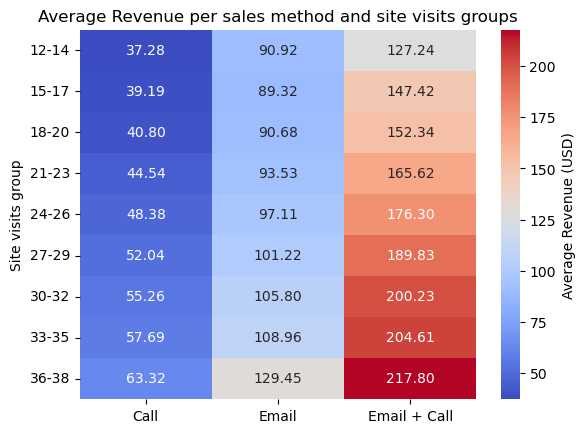

In [ ]:
sns.heatmap(site_visits_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Revenue (USD)'})
plt.title("Average Revenue per sales method and site visits groups")
plt.xlabel("")
plt.ylabel("Site visits group")
plt.yticks(rotation=0)
plt.show()


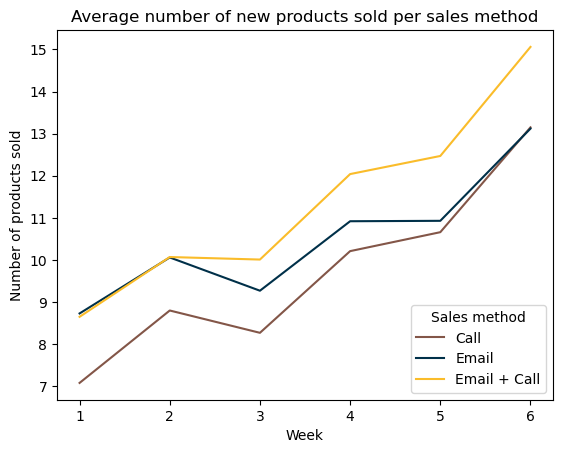

In [76]:
sales_method_metricsw= sales_clean.groupby(['week','sales_method']).agg(avg_nb_sold=('nb_sold','mean'),
                                                                       avg_years_as_cust=('years_as_customer','mean'),
                                                                       avg_site_visits=('nb_site_visits','mean')).round(2)
sales_method_metricsw= sales_method_metricsw.reset_index()
sns.lineplot(data=sales_method_metricsw, x='week', y='avg_nb_sold', units='sales_method',hue='sales_method',estimator=None,palette=custom_palette)
plt.title("Average number of new products sold per sales method")
plt.ylabel("Number of products sold")
plt.xlabel("Week")
plt.legend(title="Sales method", loc=4)
plt.show()

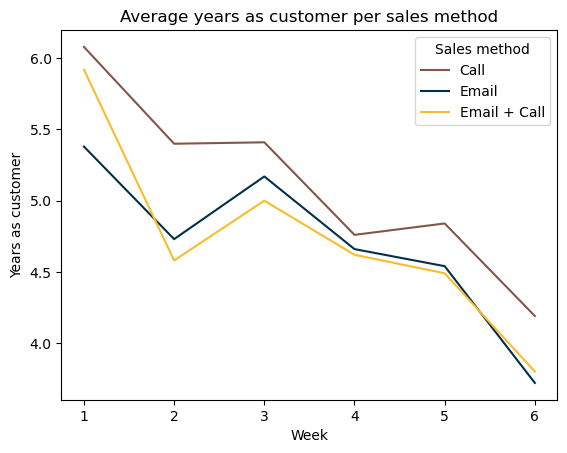

In [77]:
sns.lineplot(data=sales_method_metricsw, x='week', y='avg_years_as_cust', units='sales_method',hue='sales_method',estimator=None,palette=custom_palette)
plt.title("Average years as customer per sales method")
plt.ylabel("Years as customer")
plt.xlabel("Week")
plt.legend(title="Sales method")
plt.show()

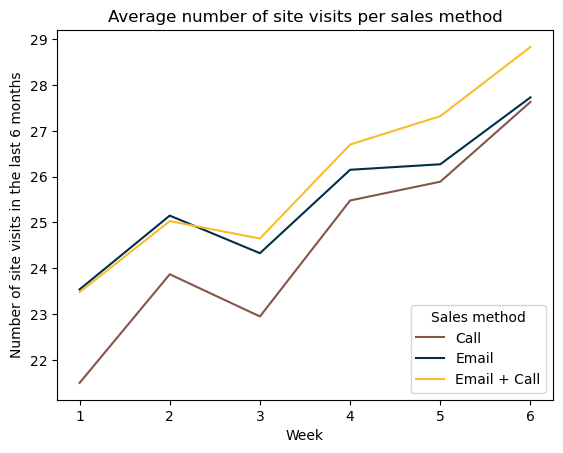

In [78]:
sns.lineplot(data=sales_method_metricsw, x='week', y='avg_site_visits', units='sales_method',hue='sales_method',estimator=None,palette=custom_palette)
plt.title("Average number of site visits per sales method")
plt.ylabel("Number of site visits in the last 6 months")
plt.xlabel("Week")
plt.legend(title="Sales method", loc=4)
plt.show()

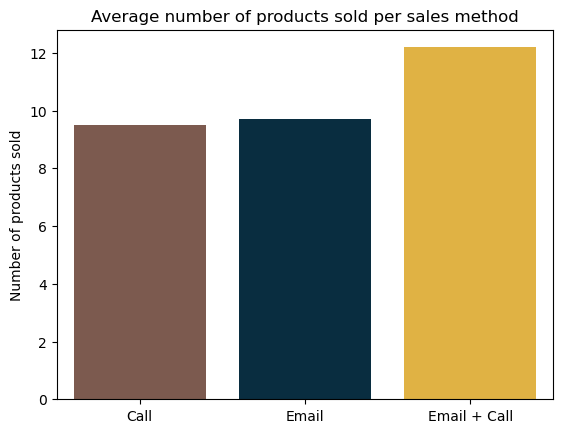

In [79]:
sales_method_metrics= sales_clean.groupby('sales_method').agg(avg_nb_sold=('nb_sold','mean'),
                                                                       avg_years_as_cust=('years_as_customer','mean'),
                                                                       avg_site_visits=('nb_site_visits','mean')).round(2)
sales_method_metrics= sales_method_metrics.reset_index()
sns.barplot(data=sales_method_metrics, x='sales_method', y='avg_nb_sold',hue='sales_method',palette=custom_palette, legend=False)
plt.title('Average number of products sold per sales method')
plt.ylabel("Number of products sold")
plt.xlabel("")
plt.show()

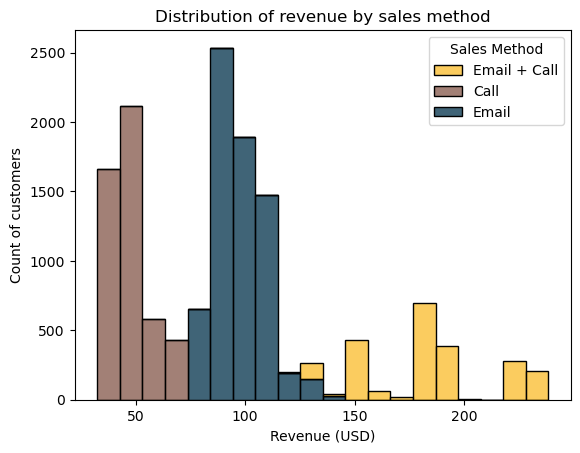

In [87]:
    hist= sns.histplot(data=sales_clean, x='revenue',hue='sales_method', palette=custom_palette, multiple='stack',stat='count',bins=20)
    plt.title('Distribution of revenue by sales method')
    plt.xlabel('Revenue (USD)')
    plt.ylabel('Count of customers')
    hist.legend_.set_title('Sales Method')
    plt.show()

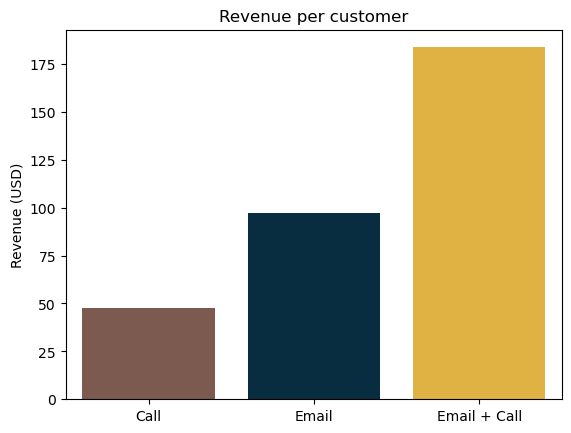

In [81]:
metrica= sales_clean.groupby('sales_method').agg(count_of_customers=('customer_id','count'),
                                           total_revenue=('revenue','sum'))

metrica['revenue_per_customer'] = metrica['total_revenue']/metrica['count_of_customers']
metrica = metrica.reset_index()
metrica = metrica.round(2)
sns.barplot(data=metrica, x='sales_method', y='revenue_per_customer',hue='sales_method', palette=custom_palette)
plt.title('Revenue per customer')
plt.xlabel('')
plt.ylabel('Revenue (USD)')
plt.show()

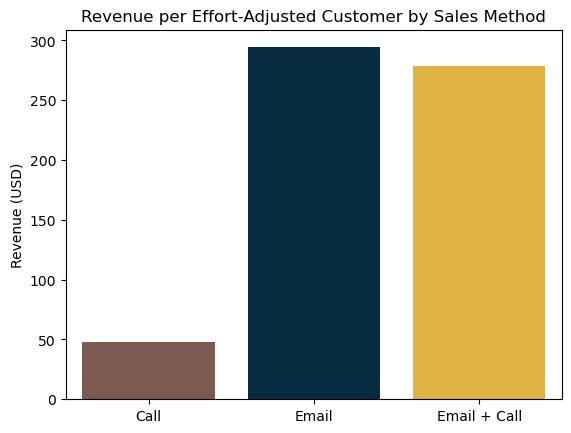

In [82]:
effort_index = {'Email': 0.33,'Call': 1,'Email + Call': 0.66}
sales_method_metricas=sales_clean.groupby('sales_method').agg(total_revenue= ('revenue', 'sum'), customer_count=('customer_id','count'))
sales_method_metricas= sales_method_metricas.reset_index()
sales_method_metricas['effort_index'] = sales_method_metricas['sales_method'].map(effort_index)
sales_method_metricas['revenue_per_effort_customer'] = (sales_method_metricas['total_revenue'] 
                                                        / (sales_method_metricas['customer_count'] * sales_method_metricas['effort_index']))
sns.barplot(data=sales_method_metricas, x='sales_method', y='revenue_per_effort_customer', hue='sales_method', palette=custom_palette)
plt.title('Revenue per Effort-Adjusted Customer by Sales Method')
plt.xlabel('')
plt.ylabel('Revenue (USD)')
plt.show()

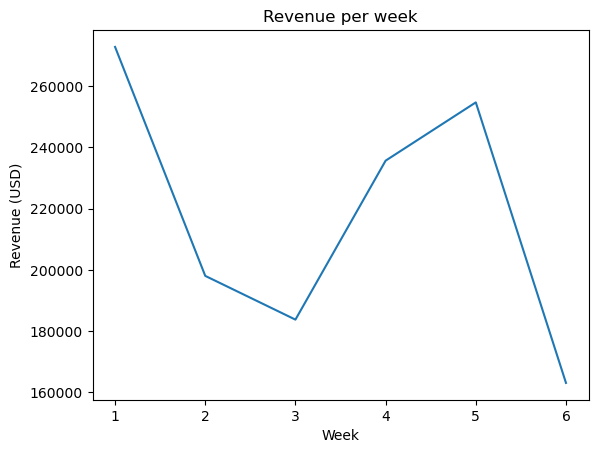

In [83]:
total_revenue_per_week = sales.groupby('week').sum('revenue')
total_revenue_per_week= total_revenue_per_week.reset_index()
sns.lineplot(data=total_revenue_per_week, x='week', y='revenue', errorbar=None)
plt.title("Revenue per week")
plt.xlabel("Week")
plt.ylabel("Revenue (USD)")
plt.show()

In [84]:
print(metrica)

   sales_method  count_of_customers  total_revenue  revenue_per_customer
0          Call                4781      227563.49                 47.60
1         Email                6922      672317.83                 97.13
2  Email + Call                2223      408256.69                183.65


In [85]:
revenue_mode_method= sales_clean.groupby('sales_method')['revenue'].apply(lambda x: x.mode()[0])
print(revenue_mode_method)

sales_method
Call             51.86
Email            98.42
Email + Call    186.53
Name: revenue, dtype: float64


In [86]:
revenue_mode = sales_clean['revenue'].mode()
print(revenue_mode)

0    51.86
Name: revenue, dtype: float64
